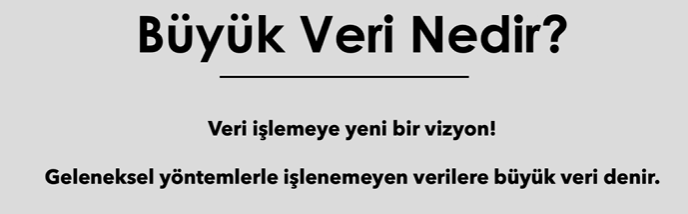 <br>
Büyük veri çok fazla değişken-parametre ve veri tipleri içeren karmaşık verisetlerinin genel adıdır. <br>

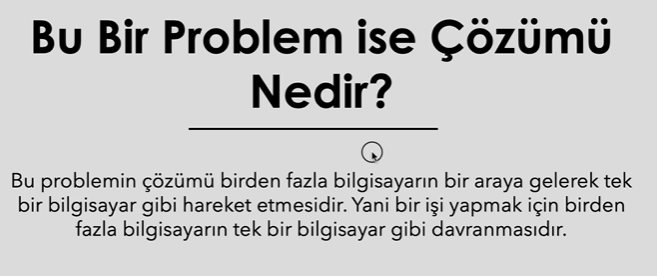 <br>

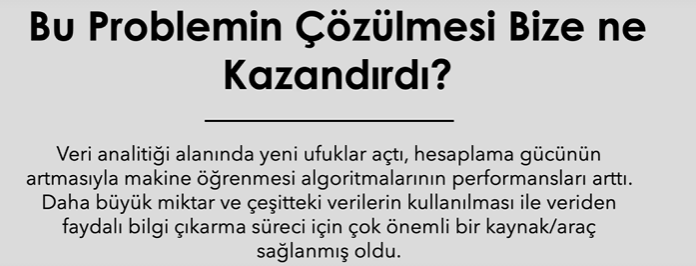 <br>

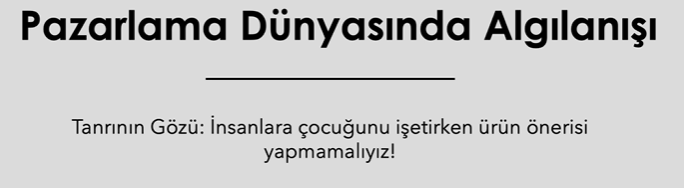 <br>

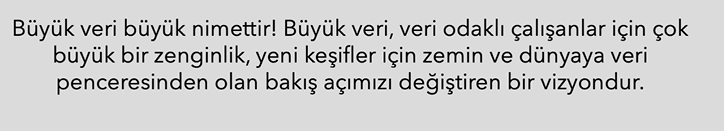 <br>

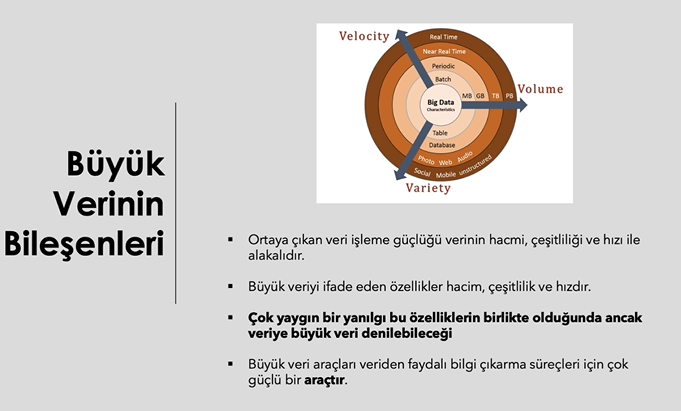

## Apache Hadoop

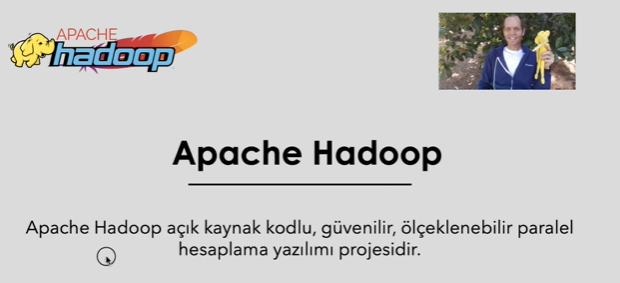 <br> 
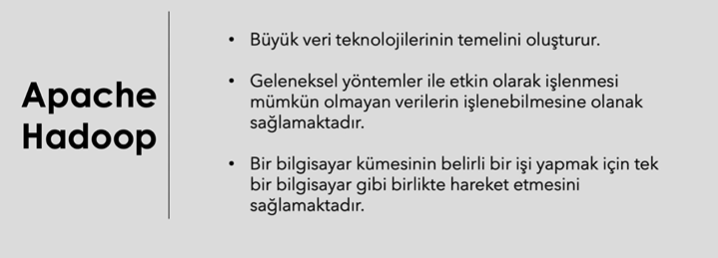 <br>

### Apache Hadoop Bileşenleri
* Hadoop Common : tüm diğer hadoop modullerini destekleyen ortak gereksinimlerdir. 
* Hadoop Dağıtık Dosya Sistemi (HDFS) : Büyük boyutlarda veriyi dağıtık şekilde kontrol etmeye olanak sağlayak dosya sistemi
* Hadoop YARN : Kaynak yönetimi ve iş dağıtımını sağlayak bileşendir.
* Hadoop MapReduce : Aynı ağ üzerindeki dağıtık bilgisayar kümelerini veri işlemesini sağlayan bileşendir.

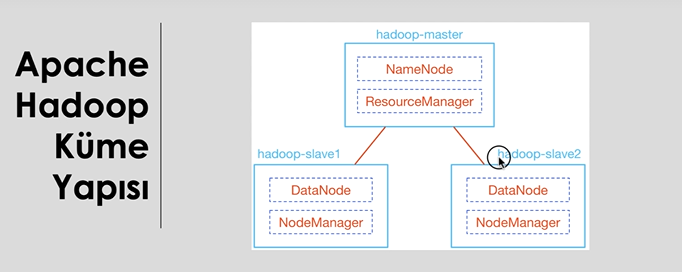 <br>

* Master : ana makine
* slave : köleler (işçiler)

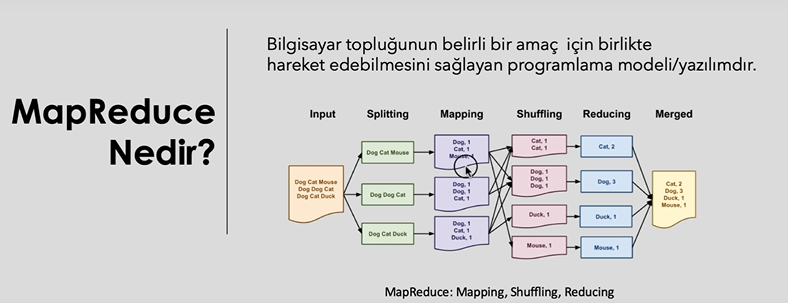 <br>

MapReduce'un 2 adet ana işlem basamağı ve değişkenlik gösterebilen alt basamakları vardır. 

* split : işçi makinalara görevi ayrıştırma
* ***mapping*** : farklı değişkenlere labelling (etiketleme) oluşturma
* shuffing : aynı etikletler aynı kümeye toplanır.
* ***reducing*** (indirgeme) : sayım işlemi
* merged : birleştirme

### Apache Hadoop Faydaları

* Veri Saklama ve İşleme Gücü
* Açık Kaynak
* Hız
* Esneklik
* Ölçeklenebilirlik
* Hata Toleransı

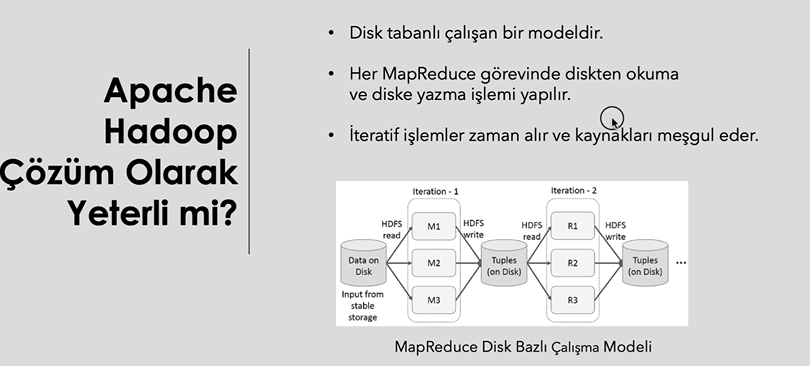

## Apache Spark
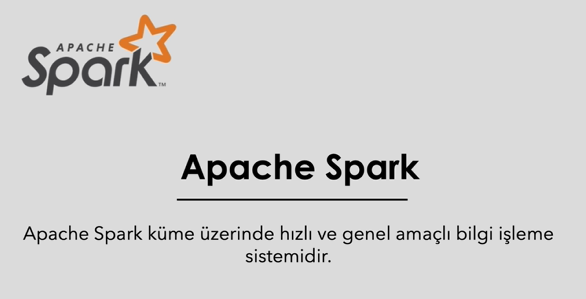 <br>
Bütün big data sistemleri Apache Hadoop üzerine kurulmuştur. Apache Spark'da Hadoopun üzerine kurulmuştur. <br>
Hadooptaki MapReduce yerine yeni bir algoritma ile işlemleri yapmaktadır.

### Apache Spark Nedir?
* MapReduce modelinde yer alan disk bazlı çalışma sisteminin yarattığı maliyetlerden dolayı ortaya  çıkmıştır.

* Apache Hadoop'a göre 100 kat daha hızlı çalışmaktadır.

* Java, Scala, Python ve Rile uygulama geliştirilebilir.

* Genelleştiricidir: Spark SQL, Spark MLlib, Spark Streaming, GraphX aynı uygulama da kullanılabilir.

### Apache Spark Bileşenleri

* Spark Core ve RDD's : temel bileşendir. hafıza yönetimi , görev dağıtımı, hata kurtarma, dosya saklama işlemleri vb. ***RDD's*** (Resilient Distributed Datasets) veri depolama işlemleri ile ilgilenir. 

* Spark SQL : SQL veya dataframe yapısını kullanarak sorgulama işlemleri yapar.

* Spark MLlib : Ölçeklenebilir Makine Öğrenmesi kütüphanesi

* Spark Streaming : Akan verinin ölçeklenebilir hata torelasnlı işlenebilmesini sağlar. Akan veriyi MapReduce gibi SparkHadoop'a aktarılabilir. canlı gösterim yapılabilir.

* GraphX : Grafik hesaplamaları için kullanılır.

### RDD's
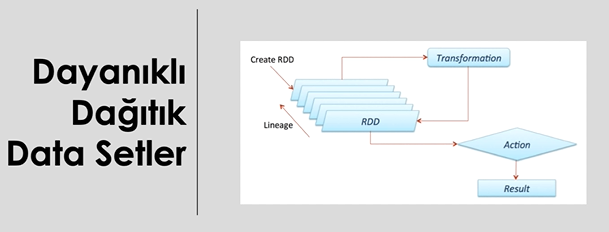 <br>

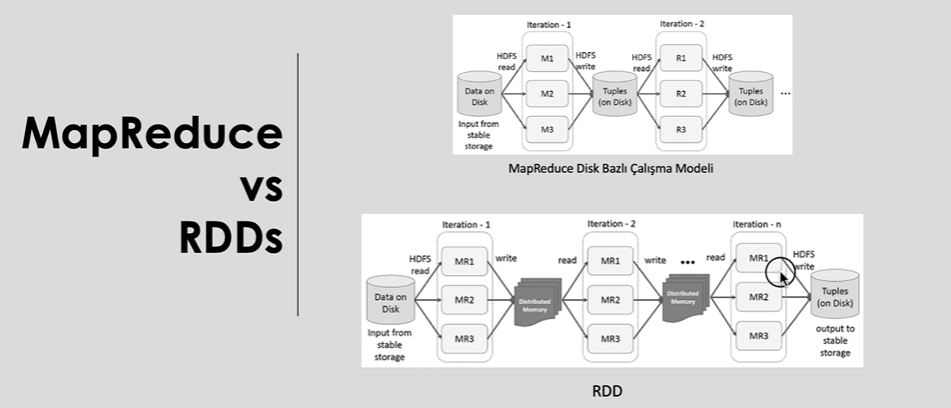

## Ekosistemin Diğer Üyeleri
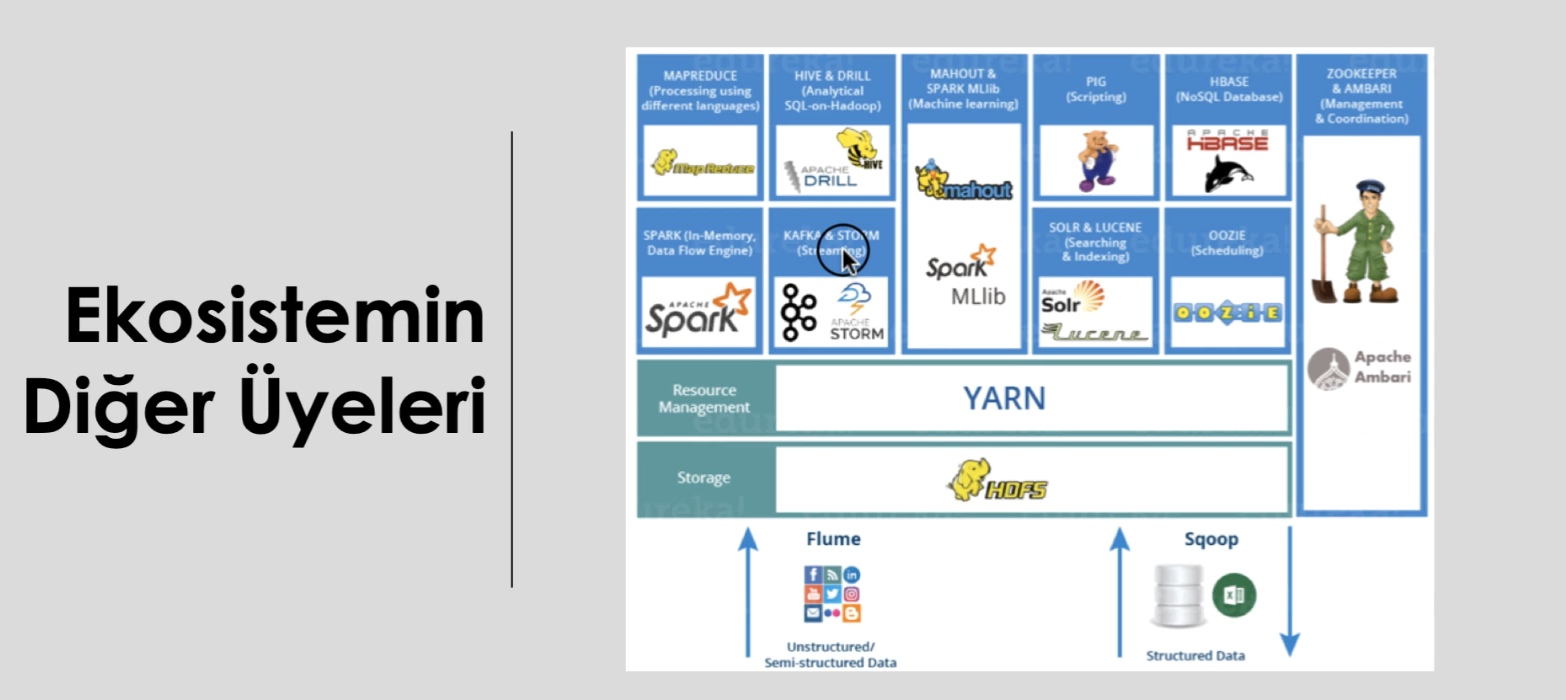

### Pyspark
Apache hadoop gibi BigData programlarının python ile iletişimini sağlayan api

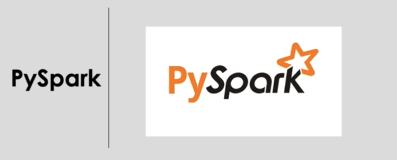

### Pyspark

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import findspark

In [3]:
findspark.init('/mnt/c/Users/abdul/spark-3.1.2-bin-hadoop3.2')

In [4]:
import pyspark

## Configurasyon ve Spark Bağlantısı

In [6]:
from pyspark import SparkContext

In [19]:
# basit bir spark bağlantısı

In [22]:
sc = SparkContext(master = 'local') # localde çalıştır
sc

<SparkContext master=local appName=pyspark-shell>

In [9]:
# versiyon

In [10]:
sc.version

'3.1.2'

In [11]:
# spark kullanıcısı

In [12]:
sc.sparkUser()

'root'

In [13]:
# uygulama adı

In [15]:
sc.appName

'pyspark-shell'

In [17]:
# spark kapatma

In [27]:
sc.stop()

### Gelişmiş Spark oluşturma

In [6]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder.\
            master('local').\
            appName('pyspark_uygulama').\
            getOrCreate()

sc = spark.sparkContext
sc

21/08/02 14:46:11 WARN Utils: Your hostname, DESKTOP-SOLJP45 resolves to a loopback address: 127.0.1.1; using 192.168.1.3 instead (on interface eth0)
21/08/02 14:46:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/02 14:46:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


<SparkContext master=local appName=pyspark_uygulama>

### Temel DataFrame İşlemleri
Dataframe işlemlerinde pyspark ile arkada spark'a çevrileceğinden. Dataframe'in bütün özelliklerini kullanamıyoruz. <br>
Bu sebep ile ***spark içinde*** yeniden düzenlenmiş ***dataframe kütüphanesi mevcut***. <br>

Yaptığımız işlemleri açılan ***spark server*** üzerinden incelemeliyiz. <br>

In [40]:
# okuma işlemi

In [8]:
spark_df = spark.read.csv('diabetes.csv',header=True,inferSchema=True)

In [11]:
# type

In [12]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [9]:
# değişkenler hakkında bilgi

In [10]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [13]:
# spark dataframe'i ram'e taşımak - cache

In [14]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [19]:
# pandas dataframe

In [16]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64'])

In [17]:
# dataframe - type

In [18]:
type(df)

pandas.core.frame.DataFrame

### Spark DF vs Pandas DF

In [20]:
# head

In [21]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [23]:
# dtypes

In [24]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [25]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [26]:
# ndim ? çalışmayacak

In [27]:
df.ndim

2

In [28]:
spark_df.ndim

AttributeError: 'DataFrame' object has no attribute 'ndim'

In [29]:
# size ? çalışmayacak

In [30]:
df.size

377580

In [31]:
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'size'

### Pandas DF
* çoklu cluster çalışma mantığı yoktur.
* değiştirebilir. (mutable)
* veri manipulasyonu zengindir.

### Spark DF
* lazzy çalışma mantığı vardır (mutlicluster)
* inmutable (değiştirilemez - sadece dönüştürme yöntemleri ile değiştirme uygulanır.)
* veri manipulasyonu güçlü değildir.

In [33]:
# print dataframe

In [38]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [39]:
# count

In [40]:
spark_df.count()

768

In [45]:
# columns

In [43]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [46]:
# describe

In [47]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [48]:
# describe spesific column

In [49]:
spark_df.describe('BloodPressure').show()

+-------+------------------+
|summary|     BloodPressure|
+-------+------------------+
|  count|               768|
|   mean|       69.10546875|
| stddev|19.355807170644777|
|    min|                 0|
|    max|               122|
+-------+------------------+



### değişken seçme işlemleri

In [51]:
spark_df.select('Glucose').show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [53]:
spark_df.select('Glucose','Pregnancies').show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [54]:
# unique değer sayısı

In [55]:
spark_df.select('Glucose').distinct().count()

136

In [56]:
# unique değerleri getir.

In [57]:
spark_df.select('Glucose').dropDuplicates().show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [58]:
# cross tab oluşturma

In [60]:
spark_df.crosstab('Outcome','Pregnancies').show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [61]:
# eksik gözlem sayısı

In [62]:
spark_df.dropna().count()

768

In [63]:
# eksik gözlemlerden kurtulma

In [65]:
spark_df.dropna().show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


### Gözlem Seçme

In [67]:
# filter

In [68]:
spark_df.filter(spark_df.Age > 40 ).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          8|    125|           96|            0|      0| 0.0|                   0.232| 54|      1|
|         10|    139|           80|            0|      0|27.1|                   1.441| 57|      0|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          8|     99|           84|            0|      0|35.4|                   0.388| 50|      0|


In [69]:
# gruplama

In [71]:
spark_df.groupby('Outcome').count() # lazy yapı

DataFrame[Outcome: int, count: bigint]

In [73]:
spark_df.groupby('Outcome').count().show() # show ile lazy yapı kalkıyor

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [74]:
# gruplama işlemi ve bir değişkene göre hesaplama

In [77]:
spark_df.groupby('Outcome').agg({'BMI' : 'mean'}).show() # Outcome değişkenine göre grupladık ve BMI değişkenine göre mean aldık

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [78]:
# yeni değişken ekleme

In [79]:
spark_df.withColumn('yeni_column',spark_df.BMI / 2).show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|yeni_column|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|       16.8|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|       13.3|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|      11.65|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|      14.05|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|      21.55|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----

In [80]:
# değişken adı değiştirme

In [81]:
spark_df.withColumnRenamed('Outcome','bagimli_degisken').show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|               1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|               0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|               1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
only showing top 5 

In [82]:
# değişken silme

In [83]:
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [84]:
spark_df.drop('Insulin').show(3)

+-----------+-------+-------------+-------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+----+------------------------+---+-------+
|          6|    148|           72|           35|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+----+------------------------+---+-------+
only showing top 3 rows



### Spark DF to Pandas DF
Spark Dataframe, üzerinde yapılan işlemleri RDD (In Memory) yani Ram'e kaydeder. Böylece erişim sağlanamaz. <br>
Böylece, Spark dataframe üzerinden veri çekme işlemleri yapamıyoruz.

In [88]:
spark_df.groupby('Outcome').count().show()[0:1,0:1] # ilk değeri alma

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



TypeError: 'NoneType' object is not subscriptable

bu sebep ile spark dataframe'i pandas'a çevirme işlemi yapacağız. 

In [91]:
converted_df = spark_df.groupby('Outcome').count().toPandas()
converted_df

,Outcome,count
0,1,268
1,0,500


In [93]:
converted_df.iloc[:1,:1]

,Outcome
0,1


Böylece Tek bir Cihazda yapılamayacak hesaplamaları ***paralel çalışan*** birçok bilgisayar üzerinde yapıp <br>
sonradan Pandas'a çevirip local'e alabiliriz.

### SQL İşlemleri

In [96]:
# dataframe'i sql table ' a kayıt etmek

In [95]:
spark_df.registerTempTable('table_df') #table df şekilde geçici bir kayıt oluşturduk

In [98]:
# sql database control

In [ ]:
spark.sql('show databases').show()

In [99]:
# sql tables control

In [100]:
spark.sql('show tables').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



### SQL

In [104]:
# basit sql query

In [102]:
spark.sql('select Glucose from table_df').show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [105]:
# groupby ve bazı fonksiyon yapıları

In [103]:
spark.sql('select Outcome, mean(Glucose) from table_df group by Outcome').show(5)

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Büyük Veri Görselleştirme

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# pandas Dataframe'deki gibi çalışıyor mu deneyelim.

In [107]:
sns.barplot(x = 'Outcome', y = spark_df.Outcome.index , data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [109]:
# çalışmamasının sebebi seaborn'un pandas DF'ye uygun olması.

In [110]:
# burada yapacağımız işlem spark üzerinde RDD'de depolanmış veri üzerinde aggregation işlemleri uygulayıp
# locale çekmek ve Pandas DF yapmak için toPandas methodunu kullanmak

In [114]:
sdf = spark_df.groupby('Outcome').count().toPandas() # spark ile büyük veriyi birçok cihaz ile aggregation işlemini hallettik
# ve pandas DF'ye çevirdik

In [115]:
sdf.head()

,Outcome,count
0,1,268
1,0,500


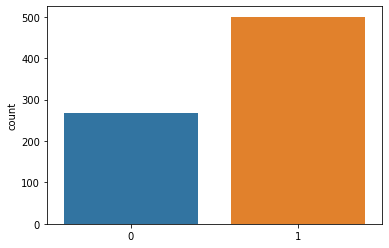

In [123]:
sns.barplot(x = sdf.Outcome.index, y = 'count' , data = sdf);